In [66]:
import pandas as pd
import swifter
pd.set_option('display.max_rows', -1)
%matplotlib inline

In [15]:
train_articles = pd.read_csv("/data/semeval-2020/task-11/processed/train_article.csv")

In [16]:
span_lables = pd.read_csv("/data/semeval-2020/task-11/processed/span_labels.csv")

In [18]:
article_with_label = train_articles.merge(span_lables,on="article_id")

In [31]:
def get_span(row):
#     print(row)
    article = row.content
    start_span = row.start
    end_span = row.end
    return article[start_span:end_span]

In [35]:
article_with_label["span"] = article_with_label.swifter.apply(get_span,axis=1)

In [37]:
article_with_label["label"] =  article_with_label.labels.apply(lambda x: x.split(","))

In [38]:
article_with_label.head()

,article_id,content,labels,start,end,span,label
0,762956953,Iran Admits To Aiding Al-Qaeda and Facilitatin...,"Exaggeration,Minimisation",630,669,the worst president in American history,"[Exaggeration, Minimisation]"
1,787529309,The Last-Minute Character Assassination of Jud...,Loaded_Language,70,88,despicable tactic,[Loaded_Language]
2,787529309,The Last-Minute Character Assassination of Jud...,Loaded_Language,288,320,have sunk to their lowest level,[Loaded_Language]
3,787529309,The Last-Minute Character Assassination of Jud...,Loaded_Language,924,961,categorically and unequivocally deny,[Loaded_Language]
4,787529309,The Last-Minute Character Assassination of Jud...,Loaded_Language,2405,2431,cesspool of public gossip,[Loaded_Language]


In [39]:
article_with_label.to_csv("/data/semeval-2020/task-11/processed/article_with_labels.csv",index=False)

### Sentences per article

In [52]:
article_sentences = pd.DataFrame(article_with_label.groupby("article_id")["content"].first()).reset_index()

In [54]:
article_sentences["num_sentences"] = article_sentences.content.swifter.apply(lambda x: len(x.split(".")))

/home/raghavan/anaconda3/envs/semeval_2020/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


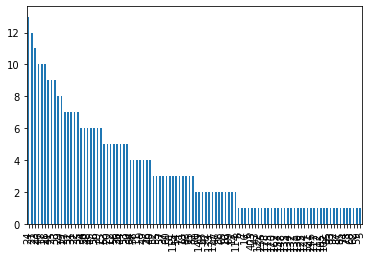

In [60]:
article_sentences.num_sentences.value_counts().plot(kind="bar")

In [79]:
sentence_counts = pd.DataFrame(article_sentences.num_sentences.value_counts()).reset_index()
sentence_counts.columns = ["sentence_length","count"]

In [81]:
sentence_counts.sort_values("sentence_length",ascending=False)

,sentence_length,count
68,403,1
86,246,1
71,235,1
72,178,1
56,177,2
73,175,1
74,170,1
75,162,1
76,157,1
77,148,1
